> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`,
* `title` - `str`,
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`.

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [9]:
#### Escreva sua resposta aqui
from dataclasses import dataclass
from enum import Enum

class BiteLevel(Enum):
    Beginner = 1
    Intermediate = 2
    Advanced = 3

@dataclass(order = True)
class Bite:
    number: int
    title: str
    level: BiteLevel = BiteLevel.Beginner

    def __post_init__(self):
        if not isinstance(self.level, str):
            self.level = BiteLevel(self.level)


    def __str__(self):
        return f'{self.number} - {self.title} ({self.level})'

bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

bites.sort()

for b in bites: print(b)


1 - Some n valores (BiteLevel.Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`).
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [12]:
#### Escreva sua resposta aqui
from pydantic import BaseModel, Field, field_validator
from typing import Optional
from datetime import datetime

class WeatherSample(BaseModel):
    date: datetime
    temperature: float
    isCelsius: bool = True
    airQualityIndex: Optional[int] = None
    sunriseTime: Optional[str] = None
    sunsetTime: Optional[str] = None

    @field_validator("date", mode="before")
    def parse_date(cls, value):
        return datetime.strptime(value, "%Y-%m-%d")

    @field_validator("temperature", mode="before")
    def convert_temperature(cls, value):
        return float(value)

    @field_validator("isCelsius", mode="before")
    def parse_is_celsius(cls, value):
        if isinstance(value, str):
            return value.lower() == "true"
        return bool(value)

    @field_validator("temperature", mode="after")
    def to_celsius(cls, temp, info):
        # Acessa o valor de `isCelsius` usando info.data no Pydantic V2
        if not info.data.get("isCelsius", True):
            return (temp - 32) * 5.0 / 9.0
        return temp

# Lista de dados fornecidos
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

# Validação e cálculo da média
weather_data = [WeatherSample(**data) for data in data_samples]
average_temperature = sum(sample.temperature for sample in weather_data) / len(weather_data)
print(f"A temperatura média em Celsius é: {average_temperature:.2f}°C")



A temperatura média em Celsius é: 47.00°C


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ...
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
```

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [19]:
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
# print(json.dumps(response, indent=2))

In [23]:
#### Escreva aqui seus modelos Pydantic

from pydantic import BaseModel, Field
from datetime import datetime
from typing import List

class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[datetime]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits  # Corrigido para "hourly_units"
    hourly: Hourly  # Corrigido para "hourly"



dados = OpenMeteo(**response)
print(dados)


latitude=-19.5 longitude=-43.375 generationtime_ms=0.028014183044433594 utc_offset_seconds=0 timezone='GMT' timezone_abbreviation='GMT' elevation=2.0 hourly_units=HourlyUnits(time='iso8601', temperature_2m='°C') hourly=Hourly(time=[datetime.datetime(2024, 11, 1, 0, 0), datetime.datetime(2024, 11, 1, 1, 0), datetime.datetime(2024, 11, 1, 2, 0), datetime.datetime(2024, 11, 1, 3, 0), datetime.datetime(2024, 11, 1, 4, 0), datetime.datetime(2024, 11, 1, 5, 0), datetime.datetime(2024, 11, 1, 6, 0), datetime.datetime(2024, 11, 1, 7, 0), datetime.datetime(2024, 11, 1, 8, 0), datetime.datetime(2024, 11, 1, 9, 0), datetime.datetime(2024, 11, 1, 10, 0), datetime.datetime(2024, 11, 1, 11, 0), datetime.datetime(2024, 11, 1, 12, 0), datetime.datetime(2024, 11, 1, 13, 0), datetime.datetime(2024, 11, 1, 14, 0), datetime.datetime(2024, 11, 1, 15, 0), datetime.datetime(2024, 11, 1, 16, 0), datetime.datetime(2024, 11, 1, 17, 0), datetime.datetime(2024, 11, 1, 18, 0), datetime.datetime(2024, 11, 1, 19, 0)

#### Q4.

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

In [26]:
!pip install matplotlib

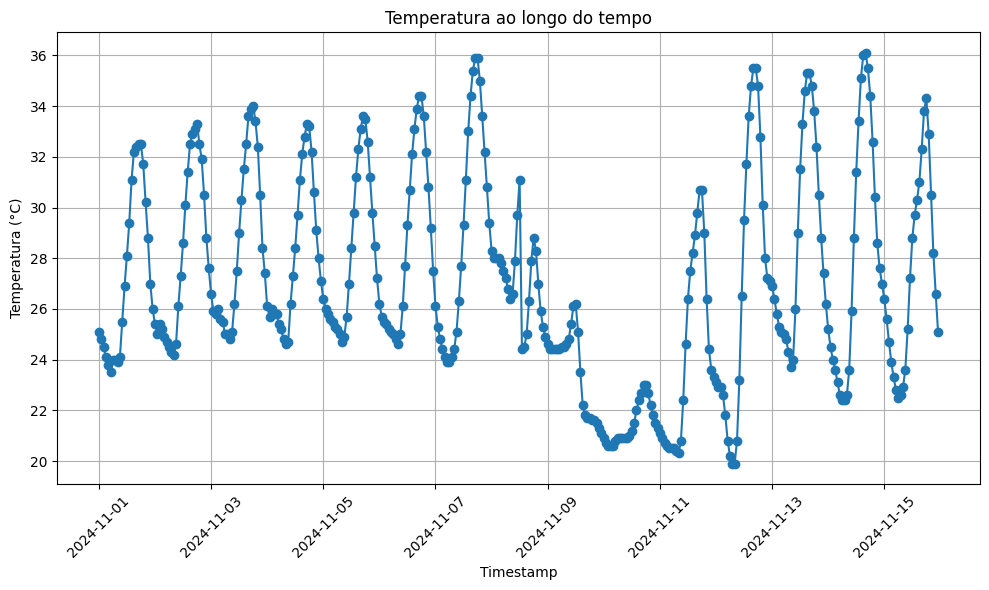

In [28]:
import matplotlib.pyplot as plt

timestamps = dados.hourly.time
temperaturas = dados.hourly.temperature_2m

plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperaturas, marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura ao longo do tempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()